In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


# 데이터 로드
df = pd.read_csv("C:/Users/tisxo/Downloads/wine.csv")


In [162]:
# 데이터 확인
print(df)
print("컬럼 확인:", df.columns)

     Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0       1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1       1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2       1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3       1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4       1    13.24        2.59  2.87  21.0  118     2.80        2.69   
..    ...      ...         ...   ...   ...  ...      ...         ...   
173     3    13.71        5.65  2.45  20.5   95     1.68        0.61   
174     3    13.40        3.91  2.48  23.0  102     1.80        0.75   
175     3    13.27        4.28  2.26  20.0  120     1.59        0.69   
176     3    13.17        2.59  2.37  20.0  120     1.65        0.68   
177     3    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                    0.28     2.29       5.64  1.04  3.92     1065

In [164]:
# 결측치 확인
print("결측치 확인 (제거 전):")
print(df.isnull().sum())

결측치 확인 (제거 전):
Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


In [166]:
# 결측치 처리
df = df.dropna()

In [168]:
print("결측치 확인 (제거 후):")
print(df.isnull().sum())

결측치 확인 (제거 후):
Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


In [170]:
# 레이블 확인 (imbalanced data)
print(df['Wine'].value_counts())

Wine
2    71
1    59
3    48
Name: count, dtype: int64


Text(0.5, 1.0, 'Label Distribution')

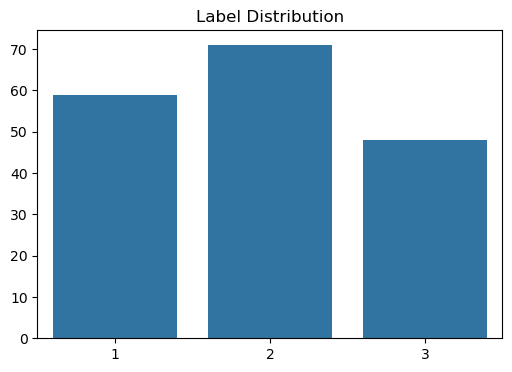

In [172]:
# 레이블 분포 시각화
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Wine')
plt.xlabel("")
plt.ylabel("")
plt.title("Label Distribution")

In [174]:
X=df.drop('Wine',axis=1)
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [176]:
y=df['Wine']
y.value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [178]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64

In [180]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [206]:
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [230]:
# 1️ (Logistic Regression)
from sklearn.linear_model import LogisticRegression

# 모델 생성 및 학습
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)

# 예측 및 평가
y_pred_lr = model_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("\n [LR]")
print(f" 정확도: {acc_lr:.4f}")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


 [LR]
 정확도: 1.0000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [232]:
#2️ (Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# 모델 생성 및 학습
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# 예측 및 평가
y_pred_dt = model_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

print("\n [DT]")
print(f" 정확도: {acc_dt:.4f}")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


 [DT]
 정확도: 0.9444
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      1.00      0.97        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


In [226]:
#3️ (Random Forest)
from sklearn.ensemble import RandomForestClassifier

# 모델 생성 및 학습
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# 예측 및 평가
y_pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\n [RF]")
print(f" 정확도: {acc_rf:.4f}")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


 [RF]
 정확도: 1.0000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [228]:
# 4️ (SVM)
from sklearn.svm import SVC

# 모델 생성 및 학습
model_svm = SVC(kernel="linear")
model_svm.fit(X_train, y_train)

# 예측 및 평가
y_pred_svm = model_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("\n [SVM]")
print(f" 정확도: {acc_svm:.4f}")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


 [SVM]
 정확도: 1.0000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
